In [1]:
!pip uninstall pandas-profiling

Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1


In [2]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.6MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 614kB 8.4MB/s 
     |████████████████████████████████| 3.1MB 12.9MB/s 
     |████████████████████████████████| 296kB 31.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=6e529b077f92c2c3a749449cbf0ab7bcec0514093444c4b642cefd742d1fa4f8
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=e2bb2245d9a2d893caabe185881cb7c22385c114844a7e91edb0777826a23d5e
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=a4d4a65e0e9a64650a2da31103f079cc673ffd1c3eb58386fe09d

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [0]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [0]:
df = pd.read_csv("/content/wine.csv")

In [41]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică. 
După instalare trebuie să facem restart la runtime.

In [0]:
from pandas_profiling import ProfileReport

In [0]:
prof=ProfileReport(df)

In [44]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='/content/output.html')

In [45]:
prof

In [0]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [47]:
prof.to_file(output_file='/content/output-min.html')

In [11]:
prof

In [0]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
X = df.drop("Wine Type", axis=1)
#obținem etichetele pentru date salvand ultima coloana
y = df['Wine Type']

In [0]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [0]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [51]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(156.0, 142)

In [52]:
sum(y_test), len(y_test)

(34.0, 36)

In [0]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler

In [18]:
X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
164,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0


In [19]:
y_train

164    1.0
119    2.0
133    1.0
69     2.0
51     0.0
      ... 
167    1.0
1      0.0
144    1.0
11     0.0
166    1.0
Name: Wine Type, Length: 142, dtype: float64

In [0]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_test

array([[ 0.42631579, -0.68228106, -0.27631579, -0.44680851, -0.04761905,
         0.11724138,  0.42618384, -0.69811321, -0.23659306, -0.22013652,
        -0.35042735,  0.41391941,  0.11554922],
       [ 0.61578947, -0.48268839, -0.21052632, -0.27659574, -0.35714286,
         0.35862069,  0.66016713, -0.66037736,  0.24290221, -0.23720137,
         0.21367521,  0.39194139,  0.7574893 ],
       [ 0.43684211, -0.73930754,  0.31578947, -0.11702128,  0.28571429,
         0.35862069,  0.33704735,  0.39622642, -0.40694006, -0.29692833,
         0.21367521,  0.26739927,  0.36519258],
       [ 0.42105263, -0.75152749,  0.31578947,  0.20212766, -0.45238095,
         0.39310345,  0.62116992, -0.39622642,  0.24290221, -0.24573379,
         0.11111111,  0.05494505,  0.43651926],
       [-0.04210526, -0.0305499 ,  0.15789474,  0.14893617, -0.33333333,
        -0.53793103, -0.8551532 ,  0.77358491, -0.65299685, -0.2662116 ,
        -0.43589744, -0.38461538, -0.58345221],
       [ 0.18947368, -0.560081

In [0]:
import torch
from torch import nn, optim

In [57]:
X_train.shape

(142, 13)

In [58]:
y_train.shape

(142,)

In [26]:
X_test.shape

(36, 13)

In [0]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [0]:
class WineNN(nn.Module):
    def __init__(self):
        super(WineNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output. 
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(13,100),
            nn.ReLU(),
            nn.Linear(100, 60),
            nn.ReLU(),
            nn.Linear(60, 3)
        )


    def forward(self, x):
        return self.sequential(x)

In [0]:
net = WineNN()

In [0]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()

In [0]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
losses = []

In [0]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()

    #Obținem predictii
    outputs = net(X_train)
    # Compute and print loss
    loss = criterion(outputs, y_train)
    
    losses.append(loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Train Epoch: {epoch} Loss:{loss.item()}")

In [0]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [0]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    test_loss=0
    correct = 0

    with torch.no_grad():

        output=net(X_test)

        test_loss= criterion(output, y_test)
        test_losses.append(test_loss.item())

        #Obținem predictiile pentru fiecare linie din setul de validare.
        #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare 
        pred = output.data.max(1, keepdim=True)[1]

        #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
        #correct += pred.eq(y_test.data.view_as(pred)).sum()
        #O altă functie din sklearn ne poate ajuta să abstractizăm operatia de mai sus.

        accuracy = accuracy_score(y_test, pred)
        
        print("============")
        print(f"[Validation set] Average loss: {test_loss}, Accuracy: {100 * accuracy}%")
        print("============")

        accuracies.append(accuracy)


In [69]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(10000):
  train(epoch)
  validation()

Streaming output truncated to the last 5000 lines.
[Validation set] Average loss: 0.017508959397673607, Accuracy: 100.0%
Train Epoch: 8751 Loss:0.003944050054997206
[Validation set] Average loss: 0.017508141696453094, Accuracy: 100.0%
Train Epoch: 8752 Loss:0.0039433944039046764
[Validation set] Average loss: 0.017507217824459076, Accuracy: 100.0%
Train Epoch: 8753 Loss:0.003942725248634815
[Validation set] Average loss: 0.01750633865594864, Accuracy: 100.0%
Train Epoch: 8754 Loss:0.003942083101719618
[Validation set] Average loss: 0.017505120486021042, Accuracy: 100.0%
Train Epoch: 8755 Loss:0.003941418137401342
[Validation set] Average loss: 0.01750423200428486, Accuracy: 100.0%
Train Epoch: 8756 Loss:0.003940763417631388
[Validation set] Average loss: 0.01750335656106472, Accuracy: 100.0%
Train Epoch: 8757 Loss:0.003940104972571135
[Validation set] Average loss: 0.01750253327190876, Accuracy: 100.0%
Train Epoch: 8758 Loss:0.003939446993172169
[Validation set] Average loss: 0.0175013

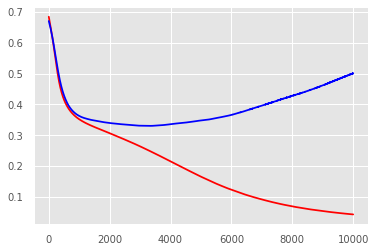

In [0]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(losses, "r-", test_losses, "b-")

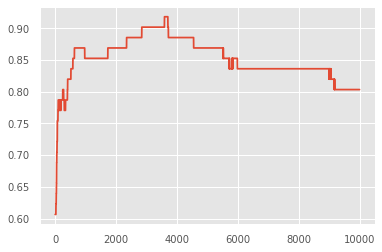

In [0]:
plt.plot(accuracies)

In [0]:
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(X_test[index_from_the_validation_set].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    print(preds_y)

In [0]:
try_a_single_example_with_the_network(60)

tensor([0])
